In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 50_Startups.csv to 50_Startups.csv
User uploaded file "50_Startups.csv" with length 2438 bytes


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import sklearn 

In [3]:
ds = pd.read_csv('50_Startups.csv')
print(ds.head())
print(ds.info())
print(ds.tail())
print(ds.describe())
print(ds.isnull().sum())
print(ds.shape)
print(ds.size)
print(ds['Profit'].max())
print(ds['Profit'].min())

   R&D Spend  Administration  Marketing Spend       state     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   state            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
    R&D Spend  Administration  Marketing Spend       state    Profit
45    1000.23       124153.04       

In [4]:
ds.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   state            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
ds.state.value_counts()

California    17
New York      17
Florida       16
Name: state, dtype: int64

In [9]:
ds.state.unique()

array(['New York', 'California', 'Florida'], dtype=object)

<BarContainer object of 3 artists>

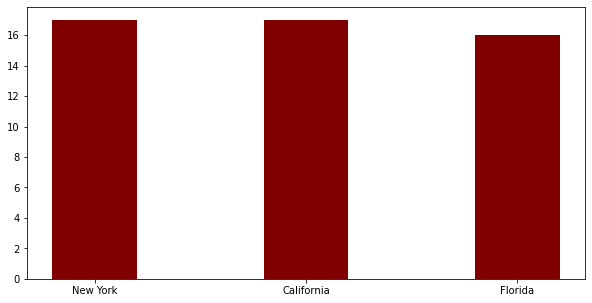

In [10]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x=ds.state.unique(),height=ds.state.value_counts(),color ='maroon',width = 0.4)

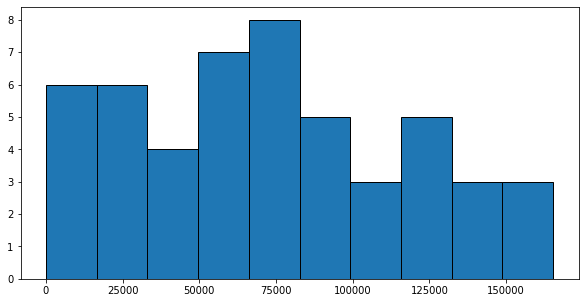

In [11]:
fig = plt.figure(figsize = (10, 5))
plt.hist(ds["R&D Spend"], edgecolor="k")
plt.show()

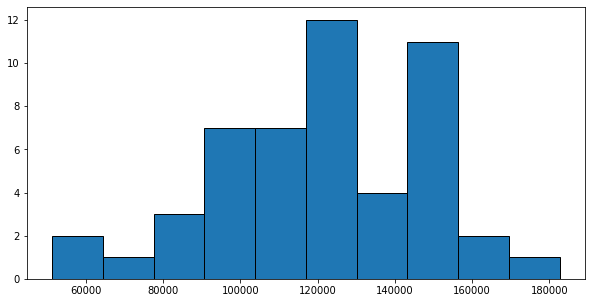

In [12]:
fig = plt.figure(figsize = (10, 5))
plt.hist(ds.Administration, edgecolor="k")
plt.show()

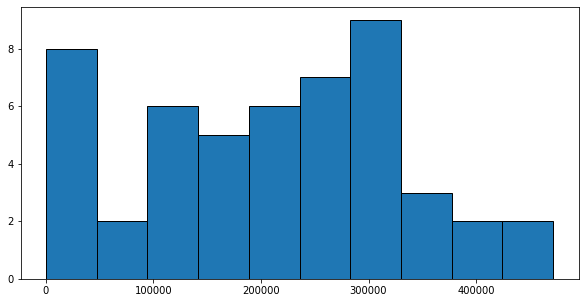

In [13]:
fig = plt.figure(figsize = (10, 5))
plt.hist(ds["Marketing Spend"], edgecolor="k")
plt.show()

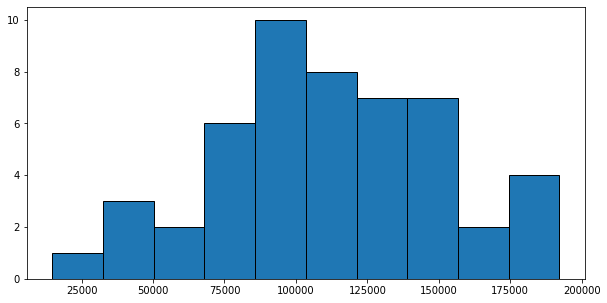

In [14]:
fig = plt.figure(figsize = (10, 5))
plt.hist(ds.Profit, edgecolor="k")
plt.show()

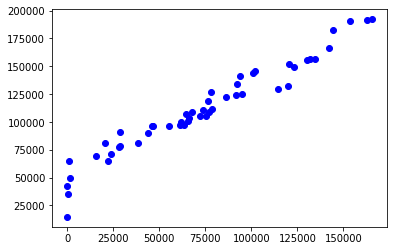

In [16]:
plt.scatter(ds["R&D Spend"],ds["Profit"], c ="blue")

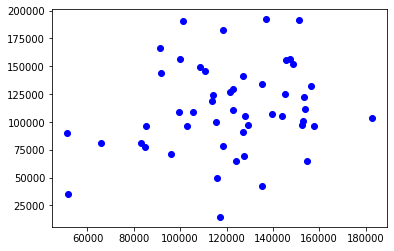

In [17]:
plt.scatter(ds["Administration"],ds["Profit"], c ="blue")

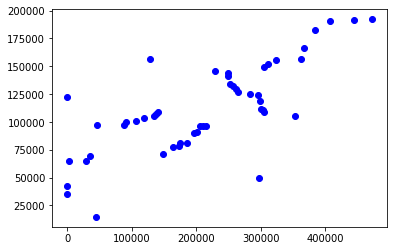

In [18]:
plt.scatter(ds["Marketing Spend"],ds["Profit"], c ="blue")

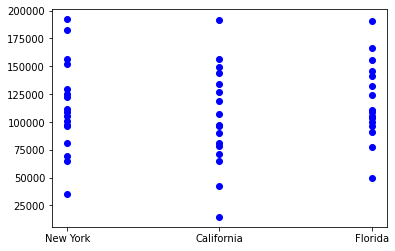

In [20]:
plt.scatter(ds["state"],ds["Profit"], c ="blue")

In [22]:
d = ds.corr()
d

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


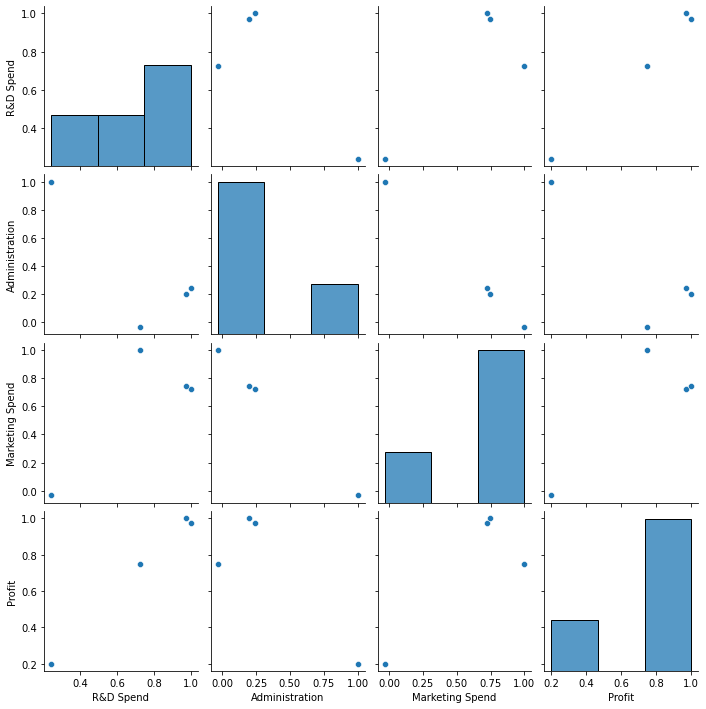

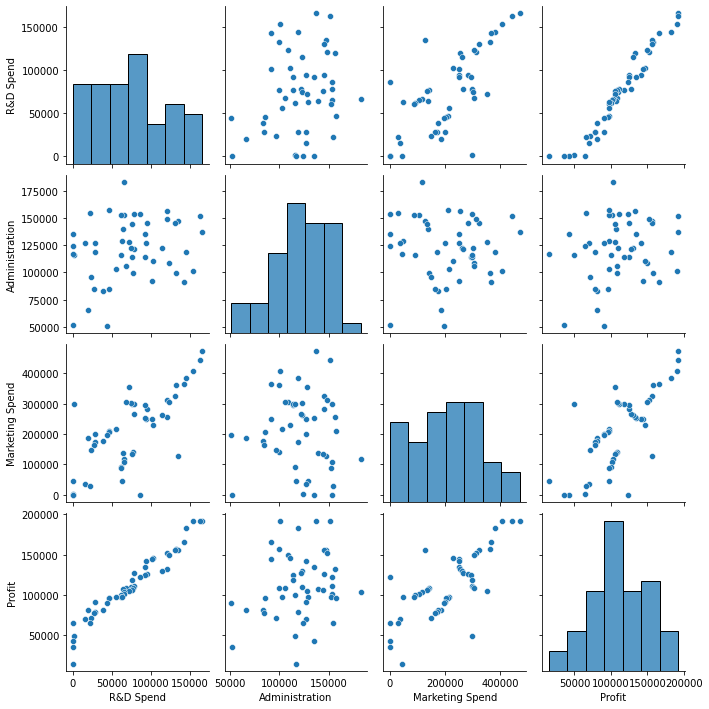

In [23]:
sns.pairplot(d)
sns.pairplot(ds)

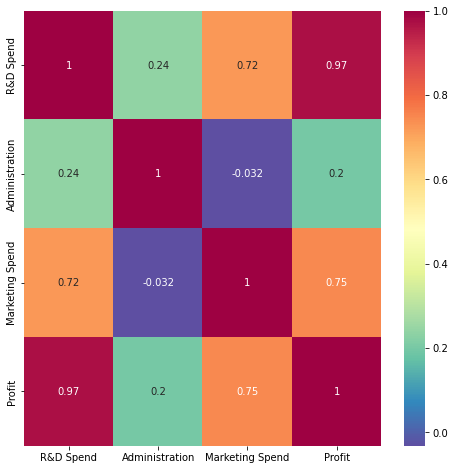

In [74]:
sns.heatmap(d,cmap='Spectral_r',annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


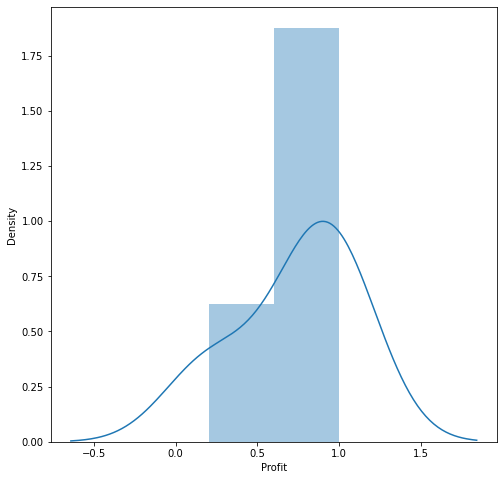

In [82]:
sns.distplot(d['Profit'])#Data Visualization:This is also undercome EDA 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


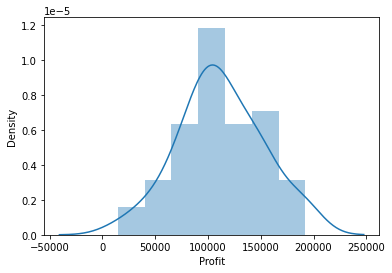

In [30]:
sns.distplot(ds['Profit'])
plt.show()

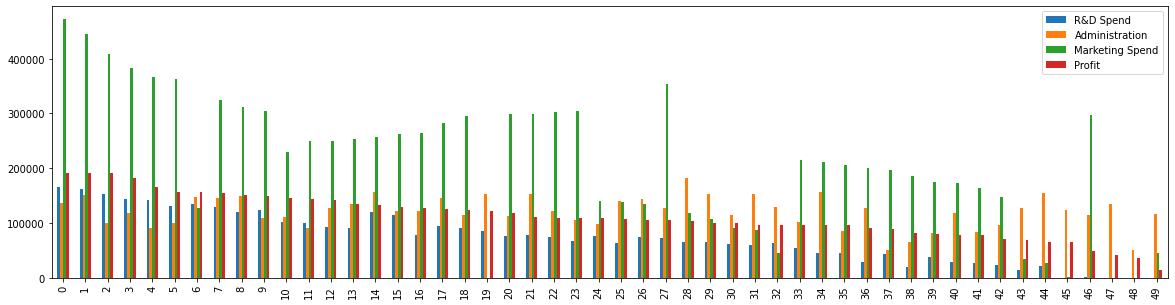

In [66]:
ds.plot(figsize=(20,5),kind='bar')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7fd1cba24790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd1cba297d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1cba30810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1cba302d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd1cbffc350>,
  <matplotlib.lines.Line2D at 0x7fd1cba29290>]}

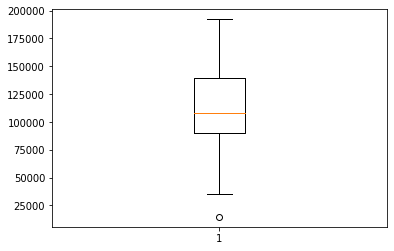

In [29]:
plt.boxplot(ds["Profit"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd1c992e810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd1cb9a6550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1cb9a5750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1cb9a59d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd1c992ef50>,
  <matplotlib.lines.Line2D at 0x7fd1cba73cd0>]}

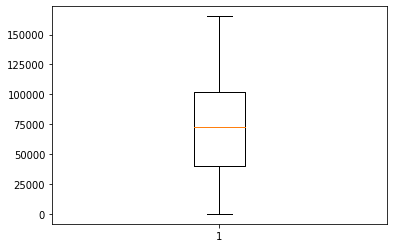

In [54]:
plt.boxplot(ds["R&D Spend"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd1cff1c790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd1cfec2d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1cfe72d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1cfe72750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd1cfe7edd0>,
  <matplotlib.lines.Line2D at 0x7fd1cfe7e410>]}

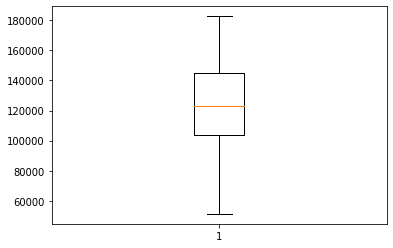

In [55]:
plt.boxplot(ds['Administration'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd1c8f13bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd1c8e9c0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1c8f12a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1c8f12d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd1c8f13dd0>,
  <matplotlib.lines.Line2D at 0x7fd1c8f13850>]}

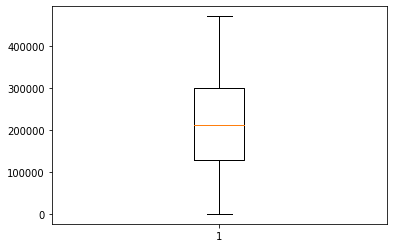

In [58]:
plt.boxplot(ds['Marketing Spend'])

In [31]:
x=ds.iloc[:,:-1]
y=ds.iloc[:,4]
print(x.head())
print(y.head())

   R&D Spend  Administration  Marketing Spend       state
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


In [36]:
state=pd.get_dummies(x['state'])
x=x.drop('state',axis=1)
x=pd.concat([x,state],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
x_train


,R&D Spend,Administration,Marketing Spend,California,Florida,New York
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0
7,130298.13,145530.06,323876.68,0,1,0
14,119943.24,156547.42,256512.92,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
48,542.05,51743.15,0.00,0,0,1
29,65605.48,153032.06,107138.38,0,0,1
15,114523.61,122616.84,261776.23,0,0,1
30,61994.48,115641.28,91131.24,0,1,0
32,63408.86,129219.61,46085.25,1,0,0


In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)
y_pred

array([104440.72582616, 132253.81567698, 132872.07174272,  71707.78771428,
       178678.9934985 , 115078.13124331,  66093.9297267 ,  98759.7276409 ,
       114113.5994088 , 167979.49411476,  95786.77295823,  87785.3497979 ,
       110455.98228344])

In [43]:
print(y_test)
print(y_train)

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
Name: Profit, dtype: float64
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64


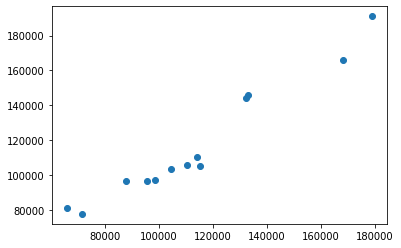

In [44]:
plt.scatter(y_pred,y_test)
plt.show()

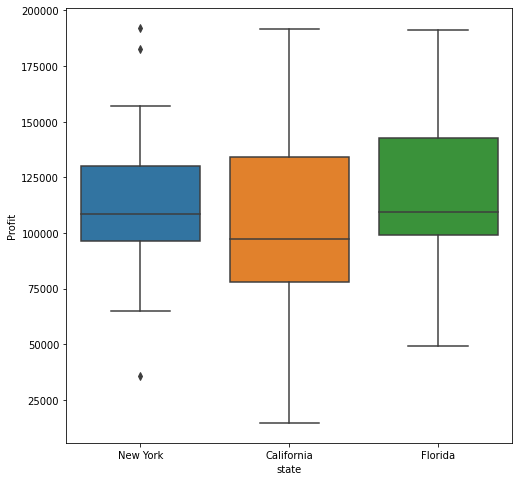

In [67]:
sns.boxplot(x = 'state', y = 'Profit', data = ds)
plt.show()

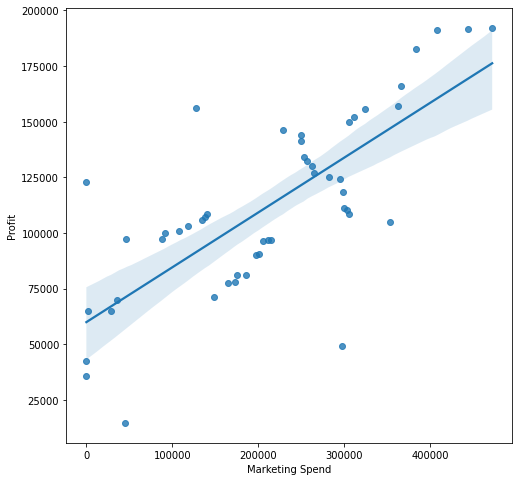

In [68]:
sns.regplot(x='Marketing Spend',y='Profit',data=ds)

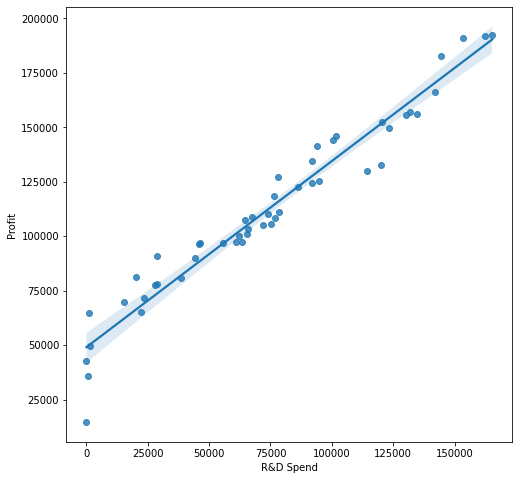

In [80]:
sns.regplot(x='R&D Spend',y='Profit',data=ds)

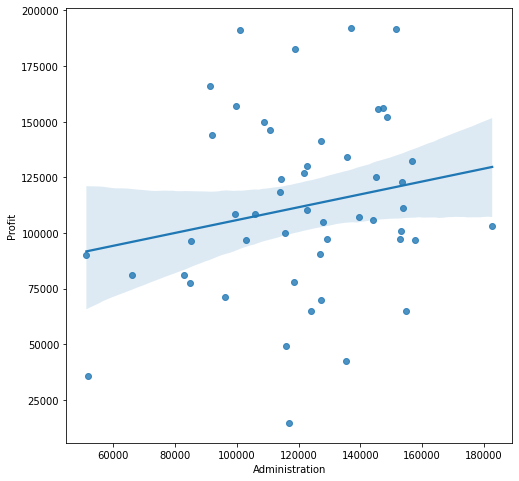

In [81]:
sns.regplot(x='Administration',y='Profit',data=ds)

In [75]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score)

R2 score of model is : 0.9274392060462607


In [79]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score of Testing data is:",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score of Training data is:",training_data_model_score)

Model Score of Testing data is: 0.9315815199152061
Model Score of Training data is: 0.9511705268907698
